In [1]:
from dataclasses import asdict, fields
from pathlib import Path
import pickle

import fsspec
import matplotlib.pyplot as plt
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

from nas import _REPO_ROOT
from nas.benchmark.nats_bench import ArchitectureResult, Dataset, Metrics

## Set up

In [2]:
sns.set_theme()
sns.set_context("notebook")

In [3]:
TRACKING_URI = str(_REPO_ROOT / "results" / "mlruns")
TRACKING_URI

'/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns'

In [4]:
EXPERIMENT_NAME = "_".join(
    (
        "sa",
        "cifar100",
        "zero_temperature",
    )
)
EXPERIMENT_NAME

'sa_cifar100_zero_temperature'

In [5]:
DATASET = Dataset.CIFAR10

In [6]:
FIGURES_DIR = _REPO_ROOT / "reports" / "figures" / EXPERIMENT_NAME
FIGURES_DIR.mkdir(exist_ok=True)

In [7]:
FIGURE_FORMAT = ".png"

In [8]:
def figure_path(name: str) -> Path:
    return (FIGURES_DIR / name).with_suffix(FIGURE_FORMAT)

## Load

In [9]:
client = mlflow.tracking.MlflowClient(tracking_uri=TRACKING_URI)
client

In [10]:
selected_experiment = client.search_experiments(
    filter_string=f"name = '{EXPERIMENT_NAME}'"
)[0]
selected_experiment

<Experiment: artifact_location='file:///home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/nas/results/mlruns/387408793635766195', creation_time=1723454388053, experiment_id='387408793635766195', last_update_time=1723454388053, lifecycle_stage='active', name='sa_cifar100_zero_temperature', tags={}>

In [11]:
selected_runs = client.search_runs(selected_experiment.experiment_id)
len(selected_runs)

10

In [12]:
run_id_series = pd.Series(run.info.run_id for run in selected_runs)
run_id_series

0    7276c26b01644787aa4f8ae3fef2eb3f
1    76a266031ff64618a3051c9a8567379e
2    84b61789547044ddbd592c9819f9d224
3    f09681098ce646d997933509b311bee2
4    85403d32183747bf89cf393ec543c2f4
5    cab403eac2c34fb0b27bf0e134abd5cd
6    26cb62cac37d4e6f85a838ff30980387
7    096e8e15a5db4e7198f9a4f7e0ac1294
8    193b6f5eaea540648e14634018f4fdb7
9    c37a44faedf046d5b61d50a6f3700723
dtype: object

### Run metrics

In [13]:
run_df = pd.json_normalize([dict(run.data) for run in selected_runs])
run_df = run_df.set_index(run_id_series)
run_df

,metrics.final_val_time_per_epoch,metrics.final_test_loss,metrics.accuracy,metrics.final_test_accuracy,metrics.time,metrics.control_parameter,metrics.final_val_loss,metrics.loss,metrics.final_val_time,metrics.final_test_time,...,params.benchmark__path,params.optimiser__number_iterations,params.seed,params.optimiser__cooling_schedule__type,params.results_dir,tags.mlflow.source.git.commit,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.runName
7276c26b01644787aa4f8ae3fef2eb3f,0.683453,1.480014,58.96,58.34,8.201430,0.0,1.452520,1.452520,8.201430,8.201430,...,models/NATS-tss-v1_0-3ffb9-simple,300,9,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,agreeable-carp-663
76a266031ff64618a3051c9a8567379e,0.662917,1.415509,60.20,60.12,7.955008,0.0,1.411848,1.411848,7.955008,7.955008,...,models/NATS-tss-v1_0-3ffb9-simple,300,8,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,gaudy-roo-322
84b61789547044ddbd592c9819f9d224,0.822189,1.355012,61.32,61.04,9.866274,0.0,1.361083,1.361083,9.866274,9.866274,...,models/NATS-tss-v1_0-3ffb9-simple,300,7,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,masked-deer-343
f09681098ce646d997933509b311bee2,0.822189,1.355012,61.32,61.04,9.866274,0.0,1.361083,1.361083,9.866274,9.866274,...,models/NATS-tss-v1_0-3ffb9-simple,300,6,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,bright-asp-622
85403d32183747bf89cf393ec543c2f4,0.683453,1.480014,58.96,58.34,8.201430,0.0,1.452520,1.452520,8.201430,8.201430,...,models/NATS-tss-v1_0-3ffb9-simple,300,5,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,handsome-lamb-874
cab403eac2c34fb0b27bf0e134abd5cd,0.662917,1.415509,60.20,60.12,7.955008,0.0,1.411848,1.411848,7.955008,7.955008,...,models/NATS-tss-v1_0-3ffb9-simple,300,4,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,righteous-horse-844
26cb62cac37d4e6f85a838ff30980387,0.712373,1.424298,60.72,59.62,8.548475,0.0,1.401476,1.401476,8.548475,8.548475,...,models/NATS-tss-v1_0-3ffb9-simple,300,3,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,intrigued-conch-828
096e8e15a5db4e7198f9a4f7e0ac1294,0.822189,1.355012,61.32,61.04,9.866274,0.0,1.361083,1.361083,9.866274,9.866274,...,models/NATS-tss-v1_0-3ffb9-simple,300,2,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,crawling-newt-680
193b6f5eaea540648e14634018f4fdb7,0.642309,1.437558,59.90,59.12,7.707704,0.0,1.429224,1.429224,7.707704,7.707704,...,models/NATS-tss-v1_0-3ffb9-simple,300,1,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,crawling-vole-623
c37a44faedf046d5b61d50a6f3700723,0.811228,1.466571,59.96,58.42,9.734739,0.0,1.444479,1.444479,9.734739,9.734739,...,models/NATS-tss-v1_0-3ffb9-simple,300,0,exponential,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,298598f4f7b1f36b1307941c6013e038f116c629,tomaz,/home/tomaz/git/Politecnico/Extra/AI-Tech-Lab/...,LOCAL,placid-crane-87


In [14]:
run_df.columns

Index(['metrics.final_val_time_per_epoch', 'metrics.final_test_loss',
       'metrics.accuracy', 'metrics.final_test_accuracy', 'metrics.time',
       'metrics.control_parameter', 'metrics.final_val_loss', 'metrics.loss',
       'metrics.final_val_time', 'metrics.final_test_time',
       'metrics.final_val_accuracy', 'metrics.transition',
       'metrics.time_per_epoch', 'metrics.final_test_time_per_epoch',
       'params.optimiser__cooling_schedule__decay_rate',
       'params.optimiser__cooling_schedule__length', 'params.results_base_dir',
       'params.benchmark__name', 'params.benchmark__dataset',
       'params.optimiser__algorithm',
       'params.optimiser__cooling_schedule__initial', 'params.experiment_name',
       'params.benchmark__path', 'params.optimiser__number_iterations',
       'params.seed', 'params.optimiser__cooling_schedule__type',
       'params.results_dir', 'tags.mlflow.source.git.commit',
       'tags.mlflow.user', 'tags.mlflow.source.name',
       'tags.mlflo

### Run metric histories

In [15]:
fields(Metrics)

(Field(name='loss',type=float | None,default=None,default_factory=<dataclasses._MISSING_TYPE object at 0x757226c61ac0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='accuracy',type=float | None,default=None,default_factory=<dataclasses._MISSING_TYPE object at 0x757226c61ac0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='time_per_epoch',type=float | None,default=None,default_factory=<dataclasses._MISSING_TYPE object at 0x757226c61ac0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD),
 Field(name='time',type=float | None,default=None,default_factory=<dataclasses._MISSING_TYPE object at 0x757226c61ac0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,_field_type=_FIELD))

In [16]:
field_names = ["transition", "control_parameter"]
field_names.extend(field.name for field in fields(Metrics))
field_names

['transition',
 'control_parameter',
 'loss',
 'accuracy',
 'time_per_epoch',
 'time']

In [17]:
history_df_list = []
for run in selected_runs:
    run_history_df = pd.DataFrame({"step": []})
    for field in field_names:
        run_id = run.info.run_id
        history = client.get_metric_history(run_id, field)
        if not history:
            continue
        field_df = pd.DataFrame(dict(step) for step in history)
        field_df = field_df[["step", "value"]].rename(columns={"value": field})
        run_history_df = run_history_df.join(
            field_df,
            how="right",
            on="step",
            rsuffix="_r",
        ).drop(columns="step_r")
    run_history_df["run_id"] = run_id
    history_df_list.append(run_history_df)
history_df = pd.concat(history_df_list).convert_dtypes().reset_index(drop=True)
history_df

,step,transition,control_parameter,loss,accuracy,time_per_epoch,time,run_id
0,0,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
1,1,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
2,2,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
3,3,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
4,4,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f
...,...,...,...,...,...,...,...,...
2995,295,0,0,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723
2996,296,0,0,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723
2997,297,0,0,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723
2998,298,0,0,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723


In [ ]:
history_df["run_id"].isin(run_id_series).all()

### Run artifacts

Final `ArchitectureResult` objects are serialised and stored as artifacts

In [ ]:
selected_runs[0].info.artifact_uri

In [ ]:
mlflow.artifacts.list_artifacts(
    selected_runs[0].info.artifact_uri, tracking_uri=TRACKING_URI
)

In [ ]:
run_results: list[ArchitectureResult] = []
for run in selected_runs:
    artifact_uri: str = run.info.artifact_uri
    with fsspec.open(Path(artifact_uri) / "result.pkl", "rb") as f:
        run_results.append(pickle.load(f))
run_results

In [ ]:
run.info.artifact_uri

In [ ]:
result_df = pd.json_normalize(asdict(result) for result in run_results)
result_df = result_df.set_index(run_id_series)
result_df

In [ ]:
result_df.columns

## Analyse

### History

In [20]:
history_df["change_accuracy"] = (
    history_df["accuracy"].shift(-1) - history_df["accuracy"]
).fillna(0)
history_df["transition_improves"] = np.sign(history_df["change_accuracy"]) >= 0
history_df["correct_transition"] = np.logical_not(
    np.logical_xor(history_df["transition"], history_df["transition_improves"])
)
history_df

,step,transition,control_parameter,loss,accuracy,time_per_epoch,time,run_id,change_accuracy,transition_improves,correct_transition
0,0,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f,0.0,True,False
1,1,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f,0.0,True,False
2,2,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f,0.0,True,False
3,3,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f,0.0,True,False
4,4,0,0,1.570768,56.1,0.758583,9.102995,7276c26b01644787aa4f8ae3fef2eb3f,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2995,295,0,0,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723,0.0,True,False
2996,296,0,0,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723,0.0,True,False
2997,297,0,0,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723,0.0,True,False
2998,298,0,0,1.444479,59.96,0.811228,9.734739,c37a44faedf046d5b61d50a6f3700723,0.0,True,False


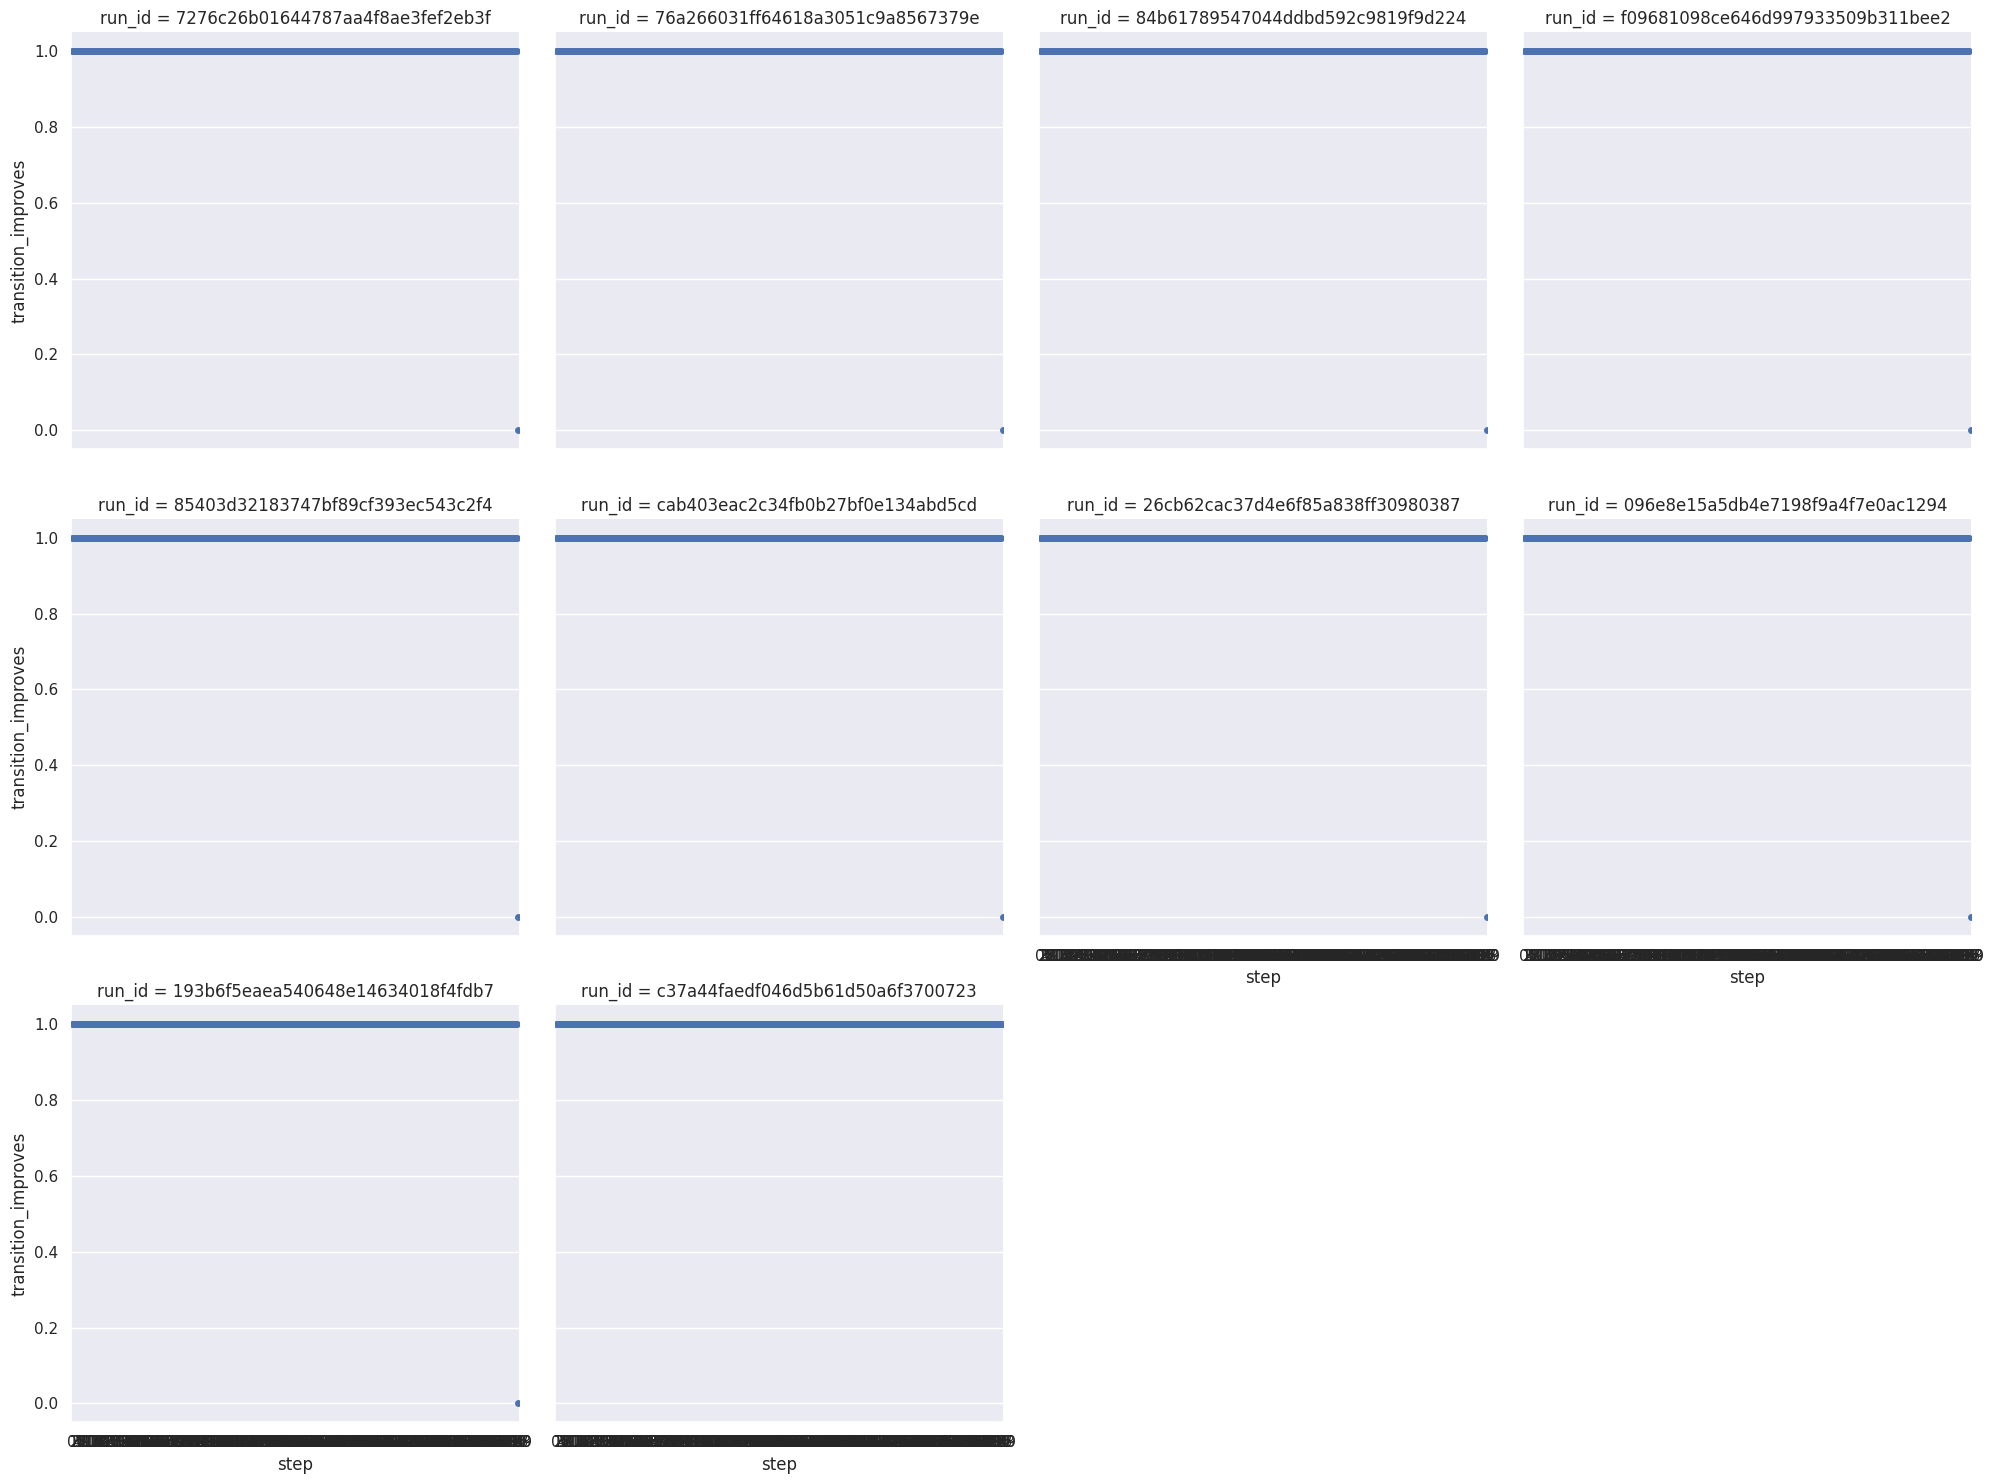

In [21]:
sns.catplot(history_df, y="transition_improves", x="step", col="run_id", col_wrap=4)

Fabrizio's plot

In [ ]:
ax = sns.lineplot(
    history_df.merge(run_df["params.seed"], left_on="run_id", right_index=True),
    x="step",
    y="accuracy",
    hue="params.seed",
    palette="husl",
    legend=False,
)
ax.set(
    xlim=10,
    xscale="log",
    xticks=[i for i in range(10, history_df["step"].max(), 100)],
)
ax.get_xaxis().set_major_formatter(ScalarFormatter())
ax.tick_params(axis="x", labelrotation=-90)
ax.set(xlabel="Trial", ylabel="Validation accuracy (%)")
plt.savefig(figure_path("history_log"))

### Final result

In [ ]:
ax = sns.histplot(
    x=result_df["index"].sort_values().astype("str"),
    stat="percent",
)
ax.set(xlabel="Architecture index")
plt.savefig(figure_path("final_index_hist"))

In [ ]:
ax = sns.stripplot(
    result_df.join(run_df),
    x="params.optimiser__number_iterations",
    y="val.accuracy",
    hue="params.seed",
    palette="husl",
    dodge=True,
    jitter=False,
    legend=False,
)
ax.set(xlabel="Number of trials", ylabel="Validation accuracy (%)")
plt.savefig(figure_path("accuracy_number_trials"))

In [76]:
def plot_accuracy_subplots(column: str, xlabel: str | None = None):
    g = sns.catplot(
        result_df.join(run_df).rename(columns={column: "n"}),
        x="params.seed",
        y="val.accuracy",
        col="n",
        col_wrap=5,
        hue="params.seed",
        palette="husl",
        aspect=0.3,
        legend=False,
    )
    for ax in g.axes:
        ax.set(xlabel=xlabel, ylabel="Validation Accuracy (%)")
    return g

In [ ]:
g = plot_accuracy_subplots("params.optimiser__number_iterations")
g.figure.supxlabel("Seed")
plt.savefig(figure_path("accuracy_number_trials_subplot"))

In [ ]:
g = plot_accuracy_subplots("params.optimiser__cooling_schedule__decay_rate")
g.figure.supxlabel("Seed")
plt.savefig(figure_path("accuracy_decay_rate_subplot"))

#### Optimalty

In [79]:
OPTIMAL_ACCURACIES = {
    Dataset.CIFAR10: 84.89199999023438,
    Dataset.CIFAR100: 61.32,
    Dataset.IMAGENET: 38.66666662597656,
}

In [ ]:
result_df["optimal"] = result_df["val.accuracy"].apply(
    lambda x: abs(x - OPTIMAL_ACCURACIES[DATASET]) < 1e-5
)
result_df["optimal"].mean()

In [ ]:
g = sns.FacetGrid(
    result_df.join(run_df).rename(
        columns={"params.optimiser__cooling_schedule__decay_rate": "n"}
    ),
    col="n",
    col_wrap=2,
    height=3,
)
g.map_dataframe(
    sns.scatterplot,
    x="params.seed",
    y="val.accuracy",
    hue="optimal",
    palette="husl",
)
g.add_legend(title="Optimal")
for ax in g.axes:
    ax.set(xlabel=None, ylabel=None)
g.figure.supxlabel("Seed")
g.figure.supylabel("Validation accuracy (%)")
plt.savefig(figure_path("optimal"))